In [147]:
import matplotlib.pyplot as plt
import  seaborn as sns
import numpy as np

In [148]:
import pandas as pd

data = pd.read_csv("C:\\Users\\anoop\\Downloads\\loan_approval_dataset.csv")

In [149]:
data

loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           778                    2400000   
1         12200000           8           417                    2700000   
2         29700000          20           506                    7100000   
3         30700000           8           467                   18200000   
4         24200000          20           382                   12400000   
...            ...         ...           ...                        ...   
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                     17600000              22700000            8000000   
1                      2200000               8800000            3300000   
2                      4500000              33300000           12800000   
3                      3300000              23300000            7900000   
4                      8200000              29400000            5000000   
...                        ...                   ...                ...   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
0        Approved  
1        Rejected  
2        Rejected  
3        Rejected  
4        Rejected  
...           ...  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved  

[4269 rows x 13 columns]

## Machine Learning Model 

1. Understand the data (Describe, info, null values)
2. Cleaning the data or making sure that teh sata is clean
3. EDA:
   1. univariate analysis
   2. Bi-variate analysis
   3. Multi-variate analysis


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [152]:
data.describe()

loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.200000e+06   
50%      10.000000    600.000000               5.600000e+06   
75%      16.000000    748.000000               1.130000e+07   
max      20.000000    900.000000               2.910000e+07   

        commercial_assets_value   luxury_assets_value   bank_asset_value  
count              4.269000e+03          4.269000e+03       4.269000e+03  
mean               4.973155e+06          1.512631e+07       4.976692e+06  
std                4.388966e+06          9.103754e+06       3.250185e+06  
min                0.000000e+00          3.000000e+05       0.000000e+00  
25%                1.300000e+06          7.500000e+06       2.300000e+06  
50%                3.700000e+06          1.460000e+07       4.600000e+06  
75%                7.600000e+06          2.170000e+07       7.100000e+06  
max                1.940000e+07          3.920000e+07       1.470000e+07

In [153]:
data.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

In [154]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [155]:
# Strip() : Function used to remove black spaces

data.columns = data.columns.str.strip()

data = data.apply(lambda x:x.str.strip() if x.dtype == 'object' else x)

data

loan_id  no_of_dependents     education self_employed  income_annum  \
0           1                 2      Graduate            No       9600000   
1           2                 0  Not Graduate           Yes       4100000   
2           3                 3      Graduate            No       9100000   
3           4                 3      Graduate            No       8200000   
4           5                 5  Not Graduate           Yes       9800000   
...       ...               ...           ...           ...           ...   
4264     4265                 5      Graduate           Yes       1000000   
4265     4266                 0  Not Graduate           Yes       3300000   
4266     4267                 2  Not Graduate            No       6500000   
4267     4268                 1  Not Graduate            No       4100000   
4268     4269                 1      Graduate            No       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12          778                   2400000   
1        12200000          8          417                   2700000   
2        29700000         20          506                   7100000   
3        30700000          8          467                  18200000   
4        24200000         20          382                  12400000   
...           ...        ...          ...                       ...   
4264      2300000         12          317                   2800000   
4265     11300000         20          559                   4200000   
4266     23900000         18          457                   1200000   
4267     12800000          8          780                   8200000   
4268     29700000         10          607                  17800000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                    17600000             22700000           8000000   
1                     2200000              8800000           3300000   
2                     4500000             33300000          12800000   
3                     3300000             23300000           7900000   
4                     8200000             29400000           5000000   
...                       ...                  ...               ...   
4264                   500000              3300000            800000   
4265                  2900000             11000000           1900000   
4266                 12400000             18100000           7300000   
4267                   700000             14100000           5800000   
4268                 11800000             35700000          12000000   

     loan_status  
0       Approved  
1       Rejected  
2       Rejected  
3       Rejected  
4       Rejected  
...          ...  
4264    Rejected  
4265    Approved  
4266    Rejected  
4267    Approved  
4268    Approved  

[4269 rows x 13 columns]

In [156]:
# Data Transformation

data['education'] = data['education'].replace({'Not Graduate':0, 'Graduate':1})

data['self_employed']= data['self_employed'].replace({'No':0, 'Yes':1})

data['loan_status'] = data['loan_status'].replace({'Approved':1,'Rejected':0})

data

C:\Users\anoop\AppData\Local\Temp\ipykernel_14184\4098228074.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['education'] = data['education'].replace({'Not Graduate':0, 'Graduate':1})
C:\Users\anoop\AppData\Local\Temp\ipykernel_14184\4098228074.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['self_employed']= data['self_employed'].replace({'No':0, 'Yes':1})
C:\Users\anoop\AppData\Local\Temp\ipykernel_14184\4098228074.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fut

loan_id  no_of_dependents  education  self_employed  income_annum  \
0           1                 2          1              0       9600000   
1           2                 0          0              1       4100000   
2           3                 3          1              0       9100000   
3           4                 3          1              0       8200000   
4           5                 5          0              1       9800000   
...       ...               ...        ...            ...           ...   
4264     4265                 5          1              1       1000000   
4265     4266                 0          0              1       3300000   
4266     4267                 2          0              0       6500000   
4267     4268                 1          0              0       4100000   
4268     4269                 1          1              0       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12          778                   2400000   
1        12200000          8          417                   2700000   
2        29700000         20          506                   7100000   
3        30700000          8          467                  18200000   
4        24200000         20          382                  12400000   
...           ...        ...          ...                       ...   
4264      2300000         12          317                   2800000   
4265     11300000         20          559                   4200000   
4266     23900000         18          457                   1200000   
4267     12800000          8          780                   8200000   
4268     29700000         10          607                  17800000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                    17600000             22700000           8000000   
1                     2200000              8800000           3300000   
2                     4500000             33300000          12800000   
3                     3300000             23300000           7900000   
4                     8200000             29400000           5000000   
...                       ...                  ...               ...   
4264                   500000              3300000            800000   
4265                  2900000             11000000           1900000   
4266                 12400000             18100000           7300000   
4267                   700000             14100000           5800000   
4268                 11800000             35700000          12000000   

      loan_status  
0               1  
1               0  
2               0  
3               0  
4               0  
...           ...  
4264            0  
4265            1  
4266            0  
4267            1  
4268            1  

[4269 rows x 13 columns]

C:\Users\anoop\AppData\Local\Temp\ipykernel_14184\2942437695.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[numerical_columns[i]], shade= True, color='r')
C:\Users\anoop\AppData\Local\Temp\ipykernel_14184\2942437695.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[numerical_columns[i]], shade= True, color='r')
C:\Users\anoop\AppData\Local\Temp\ipykernel_14184\2942437695.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[numerical_columns[i]], shade= True, color='r')
C:\Users\anoop\AppData\Local\Temp\ipykernel_14184\2942437695.py:10: FutureWarning: 

`shade` is now deprecated in favor of `

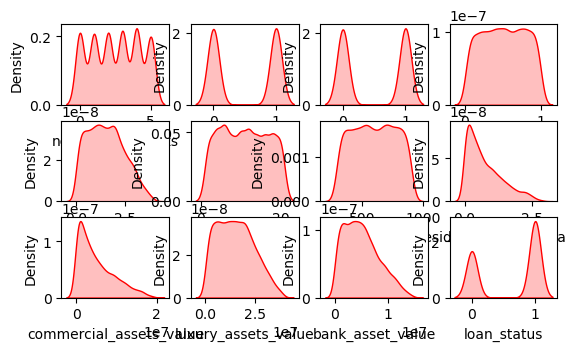

In [157]:
# Univariate analysis

numerical_columns = ['no_of_dependents', 'education', 'self_employed',
                     'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                     'residential_assets_value', 'commercial_assets_value',
                     'luxury_assets_value', 'bank_asset_value', 'loan_status']

for i in range(0, len(numerical_columns)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=data[numerical_columns[i]], shade= True, color='r')
    plt.xlabel(numerical_columns[i])



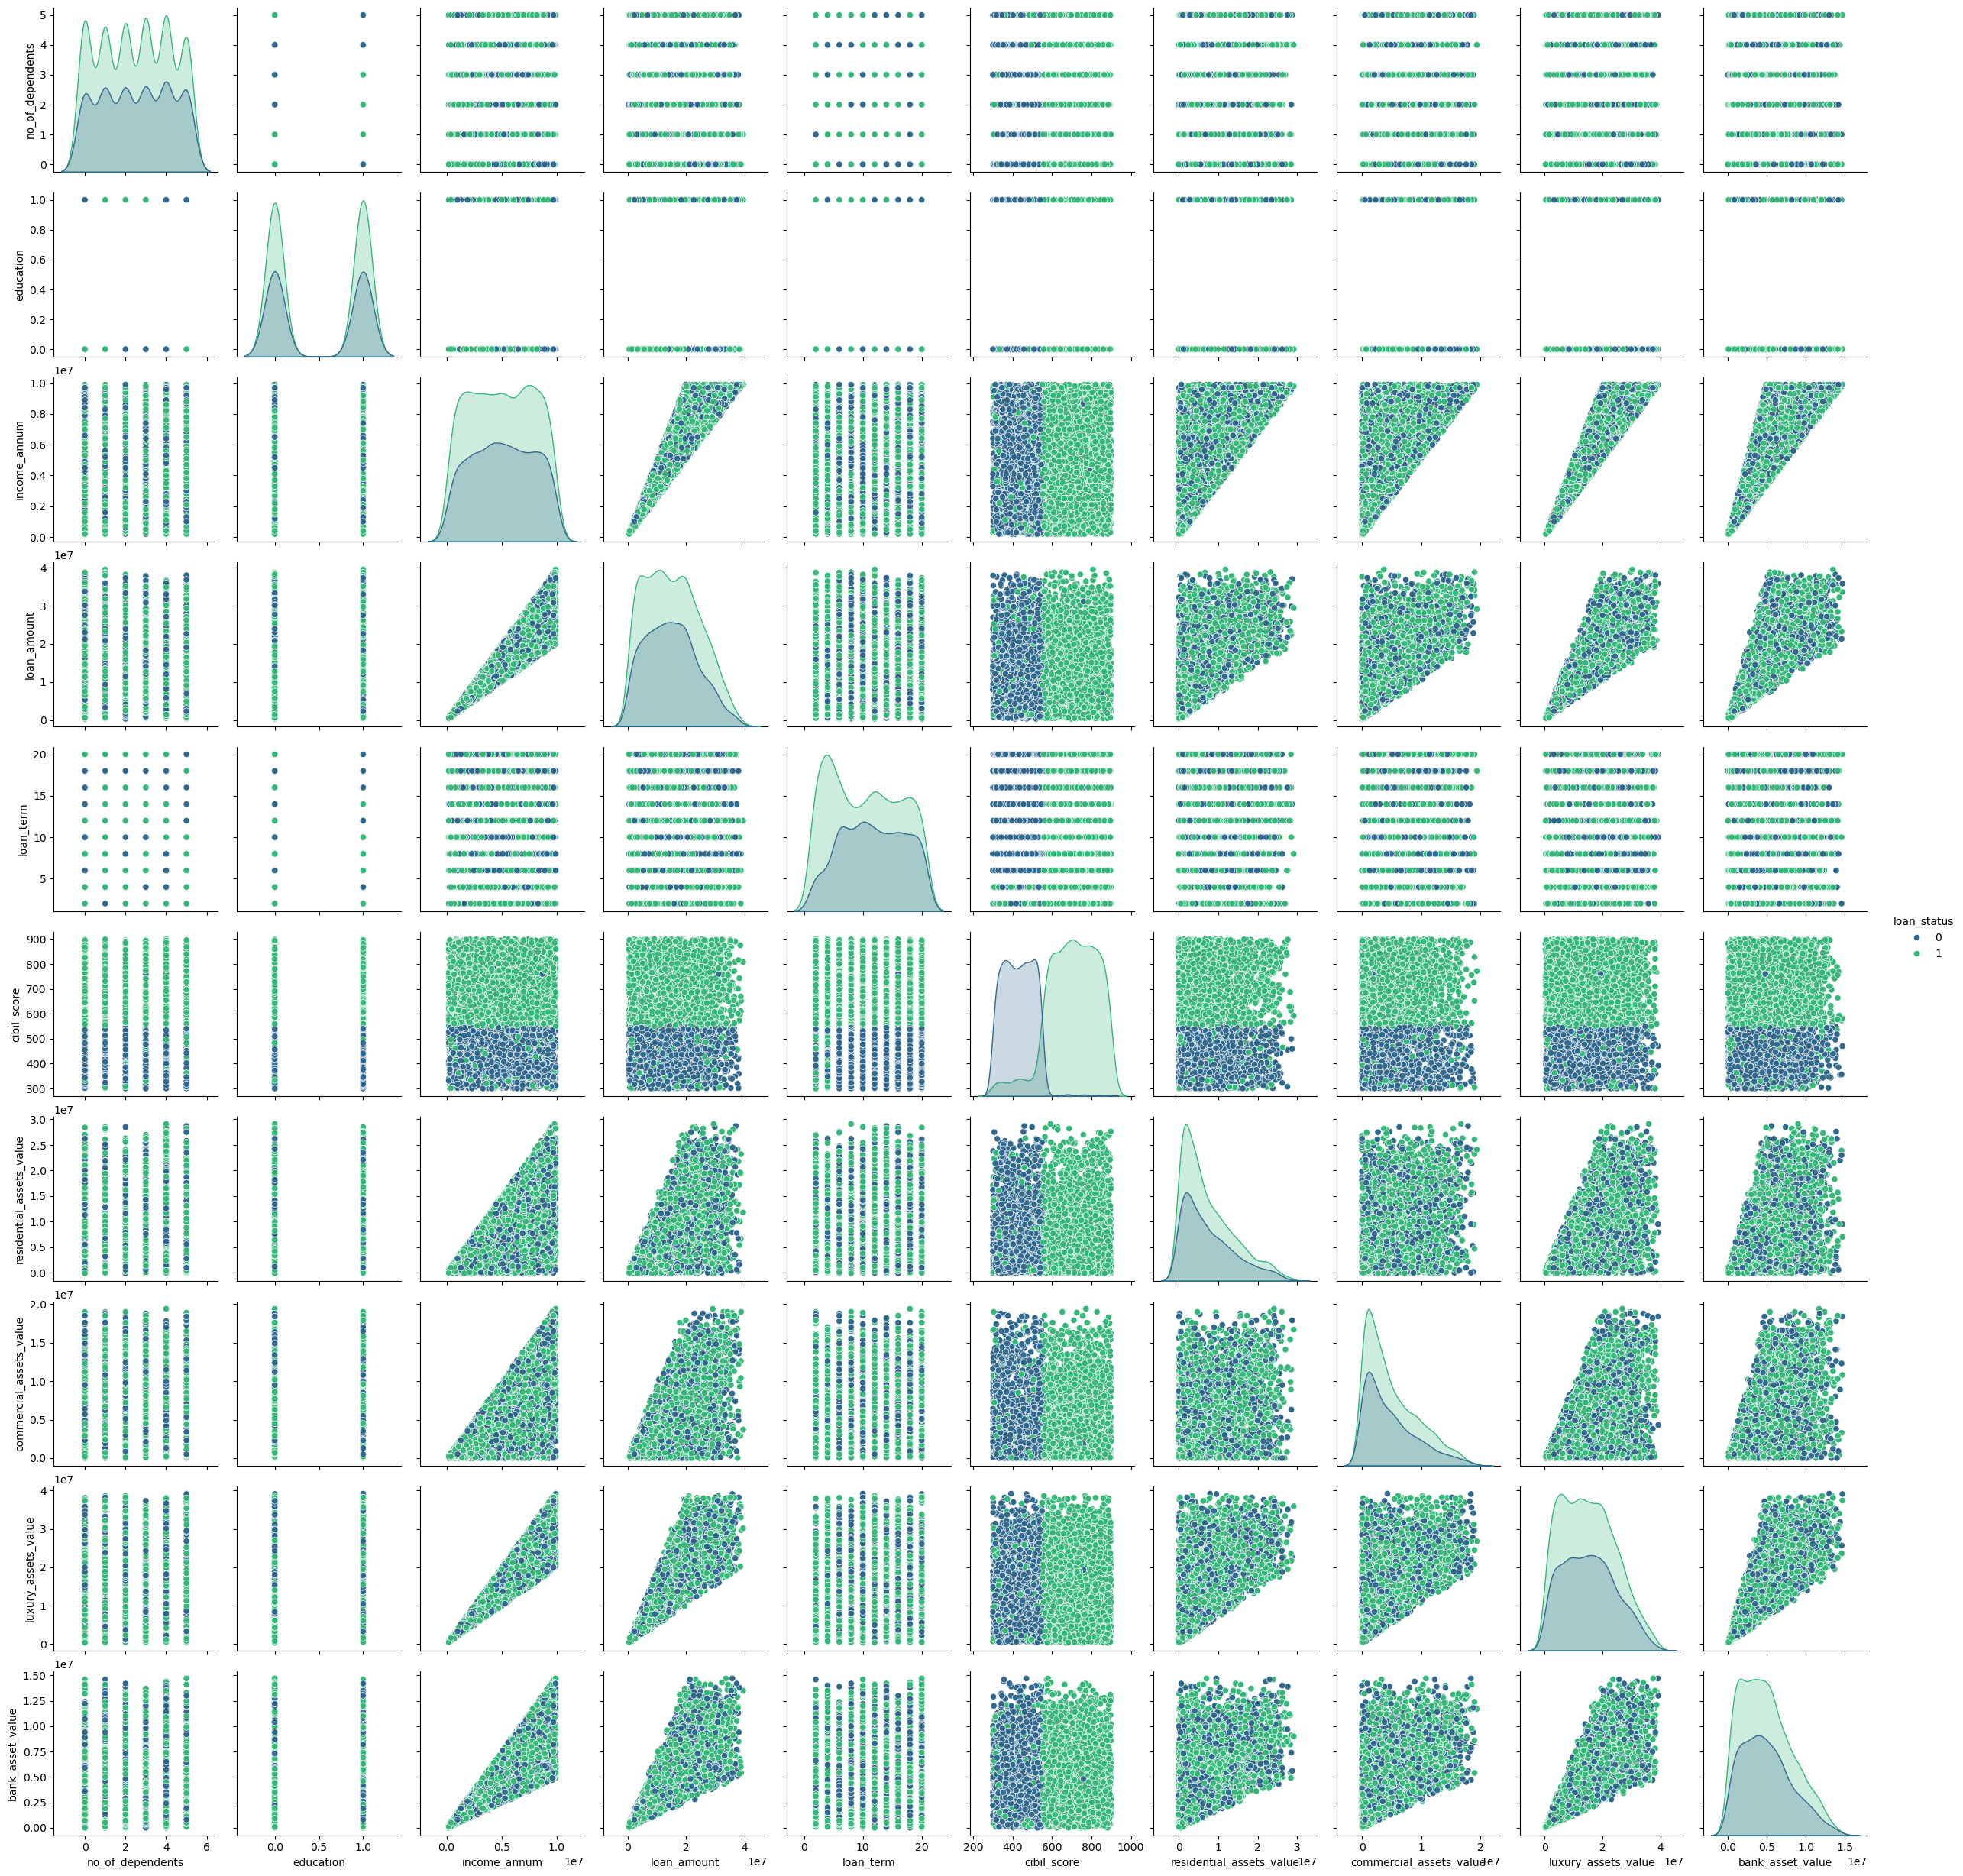

In [158]:
# Bi-variate analysis and multi-variate

numerical_columns = ['no_of_dependents', 'education',
                     'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                     'residential_assets_value', 'commercial_assets_value',
                     'luxury_assets_value', 'bank_asset_value', 'loan_status']

sns.pairplot(data[numerical_columns],hue = 'loan_status', palette = 'viridis')

plt.show()

In [159]:
#Removing all the assets column and replacing it with a total assets columns

data['tot_assets'] = data['residential_assets_value'] + data['commercial_assets_value'] + data['luxury_assets_value']  + data['bank_asset_value']


In [160]:
data.drop(columns = ['residential_assets_value', 'commercial_assets_value',
                     'luxury_assets_value', 'bank_asset_value'], inplace = True)

data

loan_id  no_of_dependents  education  self_employed  income_annum  \
0           1                 2          1              0       9600000   
1           2                 0          0              1       4100000   
2           3                 3          1              0       9100000   
3           4                 3          1              0       8200000   
4           5                 5          0              1       9800000   
...       ...               ...        ...            ...           ...   
4264     4265                 5          1              1       1000000   
4265     4266                 0          0              1       3300000   
4266     4267                 2          0              0       6500000   
4267     4268                 1          0              0       4100000   
4268     4269                 1          1              0       9200000   

      loan_amount  loan_term  cibil_score  loan_status  tot_assets  
0        29900000         12          778            1    50700000  
1        12200000          8          417            0    17000000  
2        29700000         20          506            0    57700000  
3        30700000          8          467            0    52700000  
4        24200000         20          382            0    55000000  
...           ...        ...          ...          ...         ...  
4264      2300000         12          317            0     7400000  
4265     11300000         20          559            1    20000000  
4266     23900000         18          457            0    39000000  
4267     12800000          8          780            1    28800000  
4268     29700000         10          607            1    77300000  

[4269 rows x 10 columns]

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [162]:
data.drop(columns = ['loan_id', 'no_of_dependents', 'education', 'self_employed'], inplace = True)

columns_to_drop = ['loan_id', 'no_of_dependents', 'education', 'self_employed']
existing_columns = [col for col in columns_to_drop if col in data.columns]

data.drop(columns=existing_columns, inplace=True)

x = data.drop(columns = 'loan_status')
y = data['loan_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)


In [163]:
print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.9063231850117096
